<a href="https://colab.research.google.com/github/RewinaB/peopleanalytics-regression-book/blob/master/Linear_regression_(PSYC_approach).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Linear Regression: PSYC approach

* A linear Regression is a **linear approximation** of a **relationship** between conditional expectations of two or more variables.
* It is important to note that **linear** implies the model is linear in **parameters**. So a linear regression model is perfectly able to fit both linear and nonlinear lines to the data.
* In econometric approach, we will be using the [statsmodels api](https://www.statsmodels.org/dev/examples/notebooks/generated/formulas.html). Since version 0.5.0, statsmodels allows users to fit statistical models using **R-style** formulas.
* Statsmodel is great for **interpretation aspect** of linear regression models.

Let's beging by importing the packages:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf # (For econometrics approach we use statsmodels package)

sns.set()  #if you want to use seaborn themes with matplotlib functions


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_pickle("wage_clean.pkl")
df.head()

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc
0,76900.0,40.0,93.0,12.0,11.0,2.0,31.0,1,0,8.0
1,80800.0,50.0,119.0,18.0,11.0,16.0,37.0,1,0,14.0
2,82500.0,40.0,108.0,14.0,11.0,9.0,33.0,1,0,14.0
3,65000.0,40.0,96.0,12.0,13.0,7.0,32.0,1,0,12.0
4,56200.0,40.0,74.0,11.0,14.0,5.0,34.0,1,0,6.0


In [ ]:
# pay attention to the data types. If you were importing a csv file, you must have converted marreid and black into categorical variabls again!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   wage     935 non-null    float64 
 1   hours    935 non-null    float64 
 2   IQ       935 non-null    float64 
 3   educ     935 non-null    float64 
 4   exper    935 non-null    float64 
 5   tenure   935 non-null    float64 
 6   age      935 non-null    float64 
 7   married  935 non-null    category
 8   black    935 non-null    category
 9   meduc    935 non-null    float64 
dtypes: category(2), float64(8)
memory usage: 60.4 KB


In [ ]:
df.describe().round(0)
# question, why round(0) is not rounded to 0 decimal here?

,wage,hours,IQ,educ,exper,tenure,age,meduc
count,935.0,935.0,935.0,935.0,935.0,935.0,935.0,935.0
mean,95795.0,44.0,101.0,13.0,12.0,7.0,33.0,11.0
std,40436.0,7.0,15.0,2.0,4.0,5.0,3.0,3.0
min,11500.0,20.0,50.0,9.0,1.0,0.0,28.0,0.0
25%,66900.0,40.0,92.0,12.0,8.0,3.0,30.0,9.0
50%,90500.0,40.0,102.0,12.0,11.0,7.0,33.0,12.0
75%,116000.0,48.0,112.0,16.0,15.0,11.0,36.0,12.0
max,307800.0,80.0,145.0,18.0,23.0,22.0,38.0,18.0


<ipython-input-5-06482b88c69b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['wage'], bins=30, rug=True)


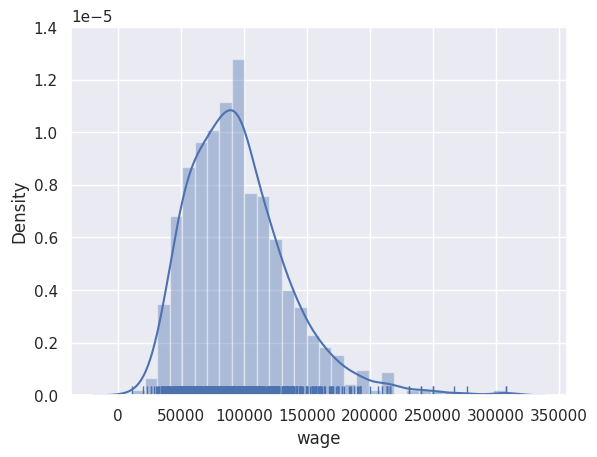

In [ ]:
sns.distplot(df['wage'], bins=30, rug=True)
plt.show()

*Exercise*:

1. What do you learn by comparing the mean and median for wage?
2. Which of the OLS assumptions is violated? What's the implication for econometrics linear regression analysis?

---

<ipython-input-6-7feb0d4301d3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['lwage'], bins=30 , rug=True)


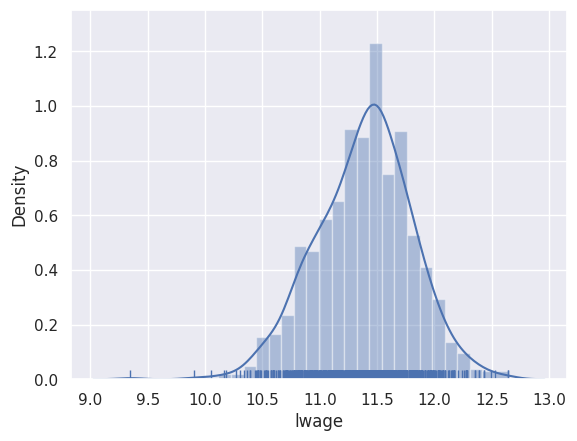

In [ ]:
# Need to do log transformation to avoid potential heteroskedasticity.
df['lwage']= np.log(df['wage'])
sns.distplot(df['lwage'], bins=30 , rug=True)
plt.show()

In [ ]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc', 'lwage'],
      dtype='object')

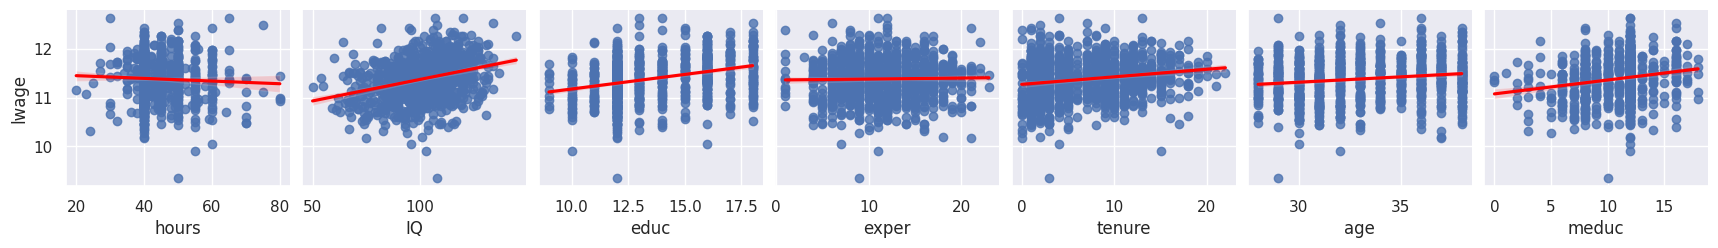

In [ ]:
sns.pairplot(df, y_vars='lwage', x_vars=['hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'meduc'], kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()

### Multiple Regression Models with Statsmodel.formula api:

In [ ]:
reg1 = smf.ols(formula= "lwage ~ IQ + educ", data=df).fit()
reg1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     69.42
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           7.88e-29
Time:                        02:46:52   Log-Likelihood:                -452.72
No. Observations:                 935   AIC:                             911.4
Df Residuals:                     932   BIC:                             926.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2635      0.096    106.643      0.000      10.075      10.452
IQ             0.0059      0.001      5.875      0.000       0.004       0.008
educ           0.0391      0.007      5.721      0.000       0.026       0.053
==============================================================================
Omnibus:                       35.757   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.770
Skew:                          -0.376   Prob(JB):                     4.23e-11
Kurtosis:                       3.813   Cond. No.                         773.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Adding categorical variables:


In [ ]:
# motivation:
df.groupby(by=['married', 'black']).mean().round(1)

wage  hours     IQ  educ  exper  tenure   age  meduc  lwage
married black                                                                 
0       0       84197.6   43.5  105.2  14.1    9.8     6.7  32.0   11.1   11.3
        1       60011.1   42.1   86.8  12.8   11.9     3.9  32.8   10.4   11.0
1       0      100728.0   44.3  103.3  13.6   11.7     7.5  33.3   11.0   11.4
        1       75979.4   41.9   85.9  12.4   12.2     6.6  32.8    9.3   11.2

In [ ]:
reg2 = smf.ols(formula= "np.log(wage) ~ IQ + educ + age + C(black) + C(married)", data=df).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     44.37
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           4.06e-41
Time:                        02:51:12   Log-Likelihood:                -417.51
No. Observations:                 935   AIC:                             847.0
Df Residuals:                     929   BIC:                             876.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           9.5149      0.173     54.963      0.000       9.175       9.855
C(black)[T.1]      -0.1451      0.040     -3.592      0.000      -0.224      -0.066
C(married)[T.1]     0.1942      0.041      4.792      0.000       0.115       0.274
IQ                  0.0047      0.001      4.563      0.000       0.003       0.007
educ                0.0412      0.007      6.236      0.000       0.028       0.054
age                 0.0207      0.004      5.130      0.000       0.013       0.029
==============================================================================
Omnibus:                       39.678   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.349
Skew:                          -0.363   Prob(JB):                     7.86e-14
Kurtosis:                       4.011   Cond. No.                     1.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Adding quadratic terms:

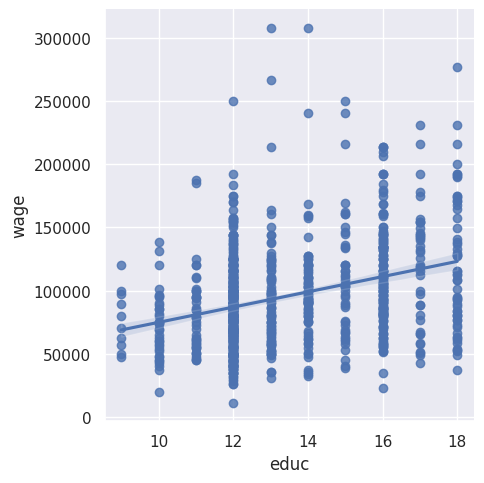

In [ ]:
# motivation:
sns.lmplot(data=df, x='educ', y='wage')
plt.show()

In [ ]:
reg3 = smf.ols(formula= "wage ~ IQ + age + educ +   I(educ**2)+ C(black) + C(married)", data=df).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     35.94
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           3.06e-39
Time:                        02:51:51   Log-Likelihood:                -11147.
No. Observations:                 935   AIC:                         2.231e+04
Df Residuals:                     928   BIC:                         2.234e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.242e+05   5.46e+04     -2.276      0.023   -2.31e+05   -1.71e+04
C(black)[T.1]   -1.139e+04   3890.603     -2.928      0.003    -1.9e+04   -3757.230
C(married)[T.1]  1.723e+04   3903.023      4.415      0.000    9571.951    2.49e+04
IQ                416.7047     99.710      4.179      0.000     221.021     612.389
age              1997.1617    395.119      5.055      0.000    1221.731    2772.592
educ             1.001e+04   7363.088      1.359      0.174   -4442.745    2.45e+04
I(educ ** 2)     -198.7737    259.316     -0.767      0.444    -707.688     310.141
==============================================================================
Omnibus:                      210.540   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              607.856
Skew:                           1.122   Prob(JB):                    1.01e-132
Kurtosis:                       6.251   Cond. No.                     1.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Adding Interaction terms:

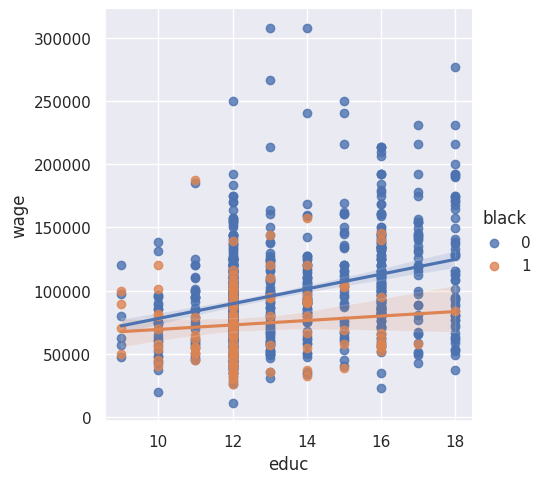

In [ ]:
# motivation:
sns.lmplot(data=df, x='educ', y='wage', hue='black')
plt.show()

In [ ]:
reg4 = smf.ols(formula= "lwage ~ IQ + educ + I(educ*np.array(black))+ C(black) + C(married)", data=df).fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     38.63
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           4.32e-36
Time:                        02:53:46   Log-Likelihood:                -429.33
No. Observations:                 935   AIC:                             870.7
Df Residuals:                     929   BIC:                             899.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    10.1673      0.113     89.946      0.000       9.945      10.389
C(black)[T.1]                 0.2607      0.268      0.971      0.332      -0.266       0.787
C(married)[T.1]               0.2149      0.041      5.264      0.000       0.135       0.295
IQ                            0.0044      0.001      4.210      0.000       0.002       0.006
educ                          0.0446      0.007      6.453      0.000       0.031       0.058
I(educ * np.array(black))    -0.0332      0.021     -1.570      0.117      -0.075       0.008
==============================================================================
Omnibus:                       43.160   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.294
Skew:                          -0.390   Prob(JB):                     6.63e-15
Kurtosis:                       4.033   Cond. No.                     2.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It's worth noting that the process we're going throuhg is referred to as **feature engineering**. As you may have noticed, feature engineering is more of an art than a science and requires a combination of domain knowledge and expert opinion.

* Let's say we are satisfied with the results of reg2 and reg3. We can now take a look into other performance metrics for this model.

### Model evaluation with Statsmodels api

Now let's look into some of the most common evaluation metrics for regression analysis. https://www.statsmodels.org/dev/tools.html

In [ ]:
from statsmodels.tools import eval_measures

In [ ]:
# predicted valued for log wage
predictions = reg3.predict()
predictions[0:10]

array([ 85190.43376449, 132273.39981133, 105114.07514569,  88437.70956904,
        77828.83485424, 109137.96350235,  53859.20049828, 132187.0380582 ,
       116598.72703878,  96009.65175602])

In [ ]:
# actual values for log wage
actuals = df.wage
np.array(actuals[0:10])

array([ 76900.,  80800.,  82500.,  65000.,  56200., 140000.,  60000.,
       108100., 115400., 100000.])

In [ ]:
np.array(reg3.resid[0:10])

array([ -8290.43376449, -51473.39981133, -22614.07514569, -23437.70956904,
       -21628.83485424,  30862.03649765,   6140.79950172, -24087.0380582 ,
        -1198.72703878,   3990.34824398])

Mean Absolute Error: MAE

In [ ]:
eval_measures.meanabs(actuals, predictions)

27379.15933200747

Median Absolute Error:

In [ ]:
eval_measures.medianabs(actuals, predictions)

21173.871717536298

Mean Squared Error: MSE

In [ ]:
eval_measures.mse(actuals, predictions)

1325327554.1599119

Root Mean Squared Error: RMSE

In [ ]:
eval_measures.rmse(actuals, predictions)

36405.048470780974

Root Mean Squared Percentage Error: RMSPE

In [ ]:
eval_measures.rmspe(actuals, predictions)

5.418190610726453

This means that your errors are 541% off! This doesn't seem right to me!!!! let us do it from scratch?

In [ ]:
np.sqrt(np.mean(((actuals-predictions)/actuals)**2))

0.5418190610726453

So the errors are 54% off on average!

I am missing something? Here is the source code in statsmodel: https://www.statsmodels.org/dev/_modules/statsmodels/tools/eval_measures.html#rmspe
They are doing this:

- mspe = np.nanmean(percentage_error ** 2, axis=axis) * 100
- return np.sqrt(mspe)

This is WRONG! we don't need that *100.

---
---
### Using statsmodels.api

We could use statsmodels.api, the **numpy array** version instead of the **formula** versin of stastmodels. Here is the documentation: https://www.statsmodels.org/stable/index.html
I personally recommned you using the formula api if you want to do heavy econometrics. The formula version is much more flexible when it comes to feature engineering.


In [ ]:
import statsmodels.api as sm

In [ ]:
df.head()

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,lwage
0,76900.0,40.0,93.0,12.0,11.0,2.0,31.0,1,0,8.0,11.250261
1,80800.0,50.0,119.0,18.0,11.0,16.0,37.0,1,0,14.0,11.299732
2,82500.0,40.0,108.0,14.0,11.0,9.0,33.0,1,0,14.0,11.320554
3,65000.0,40.0,96.0,12.0,13.0,7.0,32.0,1,0,12.0,11.082143
4,56200.0,40.0,74.0,11.0,14.0,5.0,34.0,1,0,6.0,10.936672


In [ ]:
# reg 5 (using formula)
reg5_formula = smf.ols(formula='wage ~ hours + IQ + educ + exper + tenure + age + married + black + meduc', data=df).fit()
reg5_formula.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     26.76
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           2.58e-41
Time:                        03:05:59   Log-Likelihood:                -11136.
No. Observations:                 935   AIC:                         2.229e+04
Df Residuals:                     925   BIC:                         2.234e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -7.241e+04   1.79e+04     -4.051      0.000   -1.07e+05   -3.73e+04
married[T.1]  1.685e+04   3873.155      4.349      0.000    9244.984    2.44e+04
black[T.1]   -1.099e+04   3886.857     -2.828      0.005   -1.86e+04   -3365.256
hours         -313.8567    166.081     -1.890      0.059    -639.795      12.082
IQ             373.8446     99.258      3.766      0.000     179.047     568.642
educ          5152.0987    728.253      7.075      0.000    3722.879    6581.318
exper          948.9550    368.184      2.577      0.010     226.382    1671.528
tenure         529.4372    246.546      2.147      0.032      45.583    1013.291
age           1074.9783    465.555      2.309      0.021     161.312    1988.645
meduc          994.7300    463.031      2.148      0.032      86.017    1903.443
==============================================================================
Omnibus:                      242.023   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              798.759
Skew:                           1.238   Prob(JB):                    3.56e-174
Kurtosis:                       6.790   Cond. No.                     1.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# reg 5: numpy version
X = df.drop(["wage", "lwage"], axis=1)
X = sm.add_constant(X)
X.head()

,const,hours,IQ,educ,exper,tenure,age,married,black,meduc
0,1.0,40.0,93.0,12.0,11.0,2.0,31.0,1,0,8.0
1,1.0,50.0,119.0,18.0,11.0,16.0,37.0,1,0,14.0
2,1.0,40.0,108.0,14.0,11.0,9.0,33.0,1,0,14.0
3,1.0,40.0,96.0,12.0,13.0,7.0,32.0,1,0,12.0
4,1.0,40.0,74.0,11.0,14.0,5.0,34.0,1,0,6.0


In [ ]:
reg5_numpy = sm.OLS(df['wage'], X).fit()
reg5_numpy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     26.76
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           2.58e-41
Time:                        19:43:01   Log-Likelihood:                -11136.
No. Observations:                 935   AIC:                         2.229e+04
Df Residuals:                     925   BIC:                         2.234e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.241e+04   1.79e+04     -4.051      0.000   -1.07e+05   -3.73e+04
hours       -313.8567    166.081     -1.890      0.059    -639.795      12.082
IQ           373.8446     99.258      3.766      0.000     179.047     568.642
educ        5152.0987    728.253      7.075      0.000    3722.879    6581.318
exper        948.9550    368.184      2.577      0.010     226.382    1671.528
tenure       529.4372    246.546      2.147      0.032      45.583    1013.291
age         1074.9783    465.555      2.309      0.021     161.312    1988.645
married     1.685e+04   3873.155      4.349      0.000    9244.984    2.44e+04
black      -1.099e+04   3886.857     -2.828      0.005   -1.86e+04   -3365.256
meduc        994.7300    463.031      2.148      0.032      86.017    1903.443
==============================================================================
Omnibus:                      242.023   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              798.759
Skew:                           1.238   Prob(JB):                    3.56e-174
Kurtosis:                       6.790   Cond. No.                     1.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now, let's do a more complex (feature engineered) model: $$log(wage)= \beta_0 + \beta_1 educ + \beta_2 educ^2 + \beta_3 married + \beta_4 black + \beta_5 married*black + \beta_6 log(exper) + u$$

In [ ]:
reg6_formula = smf.ols(formula="np.log(wage) ~ educ + I(educ**2) + C(married) + C(black) + I(np.array(married)*np.array(black)) + np.log(exper)", data=df).fit()
reg6_formula.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     32.96
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           4.02e-36
Time:                        20:20:09   Log-Likelihood:                -427.32
No. Observations:                 935   AIC:                             868.6
Df Residuals:                     928   BIC:                             902.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  9.2915      0.544     17.076      0.000       8.224      10.359
C(married)[T.1]                            0.1991      0.045      4.436      0.000       0.111       0.287
C(black)[T.1]                             -0.2385      0.100     -2.381      0.017      -0.435      -0.042
educ                                       0.1705      0.076      2.250      0.025       0.022       0.319
I(educ ** 2)                              -0.0037      0.003     -1.369      0.171      -0.009       0.002
I(np.array(married) * np.array(black))     0.0363      0.108      0.336      0.737      -0.175       0.248
np.log(exper)                              0.1388      0.029      4.848      0.000       0.083       0.195
==============================================================================
Omnibus:                       36.550   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.447
Skew:                          -0.352   Prob(JB):                     2.48e-12
Kurtosis:                       3.937   Cond. No.                     8.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now let's do the numpy version! first we need to prepare our X dataframe.

In [ ]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc', 'lwage'],
      dtype='object')

In [ ]:
X = df.filter(['educ', 'exper', 'married','black'], axis=1)
X.head()

,educ,exper,married,black
0,12.0,11.0,1,0
1,18.0,11.0,1,0
2,14.0,11.0,1,0
3,12.0,13.0,1,0
4,11.0,14.0,1,0


recall: $$log(wage)= \beta_0 + \beta_1 educ + \beta_2 educ^2 + \beta_3 married + \beta_4 black + \beta_5 married*black + \beta_6 log(exper) + u$$

In [ ]:
X['educ2'] = X['educ']**2
X['married*black'] = np.array(X['married']) * np.array(X['black'])
X['log_exper'] = np.log(X['exper'])
X = sm.add_constant(X)
X.head()


,const,educ,exper,married,black,educ2,married*black,log_exper
0,1.0,12.0,11.0,1,0,144.0,0,2.397895
1,1.0,18.0,11.0,1,0,324.0,0,2.397895
2,1.0,14.0,11.0,1,0,196.0,0,2.397895
3,1.0,12.0,13.0,1,0,144.0,0,2.564949
4,1.0,11.0,14.0,1,0,121.0,0,2.639057


In [ ]:
X.drop('exper', axis=1, inplace=True)


In [ ]:
reg6_numpy = sm.OLS(np.log(df['wage']), X ).fit()
reg6_numpy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     32.96
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           4.02e-36
Time:                        20:20:43   Log-Likelihood:                -427.32
No. Observations:                 935   AIC:                             868.6
Df Residuals:                     928   BIC:                             902.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.2915      0.544     17.076      0.000       8.224      10.359
educ              0.1705      0.076      2.250      0.025       0.022       0.319
married           0.1991      0.045      4.436      0.000       0.111       0.287
black            -0.2385      0.100     -2.381      0.017      -0.435      -0.042
educ2            -0.0037      0.003     -1.369      0.171      -0.009       0.002
married*black     0.0363      0.108      0.336      0.737      -0.175       0.248
log_exper         0.1388      0.029      4.848      0.000       0.083       0.195
==============================================================================
Omnibus:                       36.550   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.447
Skew:                          -0.352   Prob(JB):                     2.48e-12
Kurtosis:                       3.937   Cond. No.                     8.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Hope this is clear now why I recommend using the formula api!**



The END :)

---



## Additional links:
1. Interpreting the statsmodel output! https://towardsdatascience.com/simple-explanation-of-statsmodel-linear-regression-model-summary-35961919868b
2. Regression evaluation metrics in statsmodel.api: https://www.statsmodels.org/dev/tools.html
3. Optional: Regression diagnostics: https://www.statsmodels.org/stable/examples/notebooks/generated/regression_diagnostics.html#